# 查看FashionMNIST原始数据格式

In [1]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from wangdao_deeplearning_train import EarlyStopping, ModelSaver,train_classification_model,plot_learning_curves
from wangdao_deeplearning_train import evaluate_classification_model as evaluate_model
# 加载Fashion MNIST数据集，张量就是和numpy数组一样
transform = transforms.Compose([])
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
print(train_dataset[0])
train_dataset[0][0]

(<PIL.Image.Image image mode=L size=28x28 at 0x1ED0C91CFE0>, 9)


# 加载数据并处理为tensor

In [2]:
# 加载Fashion MNIST数据集，张量就是和numpy数组一样
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.286,), (0.353,))  
])
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# 获取图像和标签
# 注意：由于使用了transform，图像已经被转换为张量且标准化
# 我们需要从dataset中提取原始图像用于显示
train_images = train_dataset.data.numpy()
train_labels = train_dataset.targets.numpy()
test_images = test_dataset.data.numpy()
test_labels = test_dataset.targets.numpy()

# 定义类别名称
class_names = ['T-shirt/top', '裤子', '套头衫', '连衣裙', '外套',
               '凉鞋', '衬衫', '运动鞋', '包', '短靴']

# 查看数据集基本信息
print(f"训练集形状: {train_images.shape}")
print(f"训练集标签数量: {len(train_labels)}")
print(f"测试集形状: {test_images.shape}")
print(f"测试集标签数量: {len(test_labels)}")

print(train_images[0])

train_labels[0:20]


训练集形状: (60000, 28, 28)
训练集标签数量: 60000
测试集形状: (10000, 28, 28)
测试集标签数量: 10000
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4],
      dtype=int64)

In [3]:
#查看归一化后的效果
train_dataset[0]

(tensor([[[-8.1020e-01, -8.1020e-01, -8.1020e-01, -8.1020e-01, -8.1020e-01,
           -8.1020e-01, -8.1020e-01, -8.1020e-01, -8.1020e-01, -8.1020e-01,
           -8.1020e-01, -8.1020e-01, -8.1020e-01, -8.1020e-01, -8.1020e-01,
           -8.1020e-01, -8.1020e-01, -8.1020e-01, -8.1020e-01, -8.1020e-01,
           -8.1020e-01, -8.1020e-01, -8.1020e-01, -8.1020e-01, -8.1020e-01,
           -8.1020e-01, -8.1020e-01, -8.1020e-01],
          [-8.1020e-01, -8.1020e-01, -8.1020e-01, -8.1020e-01, -8.1020e-01,
           -8.1020e-01, -8.1020e-01, -8.1020e-01, -8.1020e-01, -8.1020e-01,
           -8.1020e-01, -8.1020e-01, -8.1020e-01, -8.1020e-01, -8.1020e-01,
           -8.1020e-01, -8.1020e-01, -8.1020e-01, -8.1020e-01, -8.1020e-01,
           -8.1020e-01, -8.1020e-01, -8.1020e-01, -8.1020e-01, -8.1020e-01,
           -8.1020e-01, -8.1020e-01, -8.1020e-01],
          [-8.1020e-01, -8.1020e-01, -8.1020e-01, -8.1020e-01, -8.1020e-01,
           -8.1020e-01, -8.1020e-01, -8.1020e-01, -8.1020e-01,

In [4]:
train_dataset[0][0].shape

torch.Size([1, 28, 28])

In [5]:
train_dataset[0][0].squeeze().shape

torch.Size([28, 28])

# 把数据集划分为训练集55000和验证集5000，并给DataLoader

In [6]:
# 从训练集中划分出验证集
train_size = 55000
val_size = 5000
# 设置随机种子以确保每次得到相同的随机划分结果
generator = torch.Generator().manual_seed(42)
train_subset, val_subset = torch.utils.data.random_split(
    train_dataset, 
    [train_size, val_size],
    generator=generator #设置随机种子，确保每次得到相同的随机划分结果
)

# 创建数据加载器
batch_size = 64
train_loader = torch.utils.data.DataLoader(
    train_subset,
    batch_size=batch_size,
    shuffle=True #打乱数据集，每次迭代时，数据集的顺序都会被打乱
)

val_loader = torch.utils.data.DataLoader(
    val_subset,
    batch_size=batch_size,
    shuffle=False
)

test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False
)

# 打印数据集大小信息
print(f"训练集大小: {len(train_subset)}")
print(f"验证集大小: {len(val_subset)}")
print(f"测试集大小: {len(test_dataset)}")
print(f"批次大小: {batch_size}")
print(f"训练批次数: {len(train_loader)}")


训练集大小: 55000
验证集大小: 5000
测试集大小: 10000
批次大小: 64
训练批次数: 860


In [7]:
64*860

55040

# 搭建模型

In [8]:

#理解每个接口的方法，单独写例子
import torch.nn as nn
m=nn.BatchNorm1d(100) # 创建一个批量归一化层，输入特征维度为100
x=torch.randn(20,100) # 创建一个20行100列的随机张量
print(m(x).shape) # 打印批量归一化后的张量形状

torch.Size([20, 100])


In [9]:
import torch.nn as nn
import torch.nn.functional as F

class NeuralNetwork(nn.Module):
    def __init__(self, layers_num=2):
        super().__init__()
        self.flatten = nn.Flatten() #Flatten是将多维张量展平成一维张量
        # 多加几层
        self.linear_relu_stack = nn.Sequential( #Sequential是顺序容器，将多个层按顺序组合成一个模型
            nn.Linear(28 * 28, 100), # 输入层 -> 第一隐藏层 (28*28=784 -> 300)
            nn.ReLU(), # 激活函数
        )
        # 加19层
        for i in range(1, layers_num):
            self.linear_relu_stack.add_module(f"Linear_{i}", nn.Linear(100, 100))
            self.linear_relu_stack.add_module(f"BatchNorm_{i}", nn.BatchNorm1d(100)) #BatchNorm1d是批量归一化，将输入的特征归一化到均值为0，方差为1
            self.linear_relu_stack.add_module(f"relu", nn.ReLU())
        # 输出层
        self.linear_relu_stack.add_module("Output Layer", nn.Linear(100, 10))
        
        # 初始化权重
        # self.init_weights()
        
    def init_weights(self):
        """使用 xavier 均匀分布来初始化全连接层的权重 W"""
        # print('''初始化权重''')
        for m in self.modules():
            # print(m)
            # print('-'*50)
            if isinstance(m, nn.Linear):#判断m是否为全连接层
                nn.init.xavier_uniform_(m.weight) # xavier 均匀分布初始化权重
                nn.init.zeros_(m.bias) # 全零初始化偏置项
        # print('''初始化权重完成''')
    def forward(self, x):
        # x.shape [batch size, 1, 28, 28]
        x = self.flatten(x)  
        # 展平后 x.shape [batch size, 28 * 28]
        logits = self.linear_relu_stack(x)
        # logits.shape [batch size, 10]
        return logits


In [10]:
# 实例化模型
model = NeuralNetwork()

# 从train_loader获取第一个批次的数据
dataiter = iter(train_loader)
images, labels = next(dataiter)

# 查看批次数据的形状
print("批次图像形状:", images.shape)
print("批次标签形状:", labels.shape)


print('-'*100)
# 进行前向传播
with torch.no_grad():  # 不需要计算梯度
    outputs = model(images)

批次图像形状: torch.Size([64, 1, 28, 28])
批次标签形状: torch.Size([64])
----------------------------------------------------------------------------------------------------


In [15]:
next(model.parameters()).numel()

78400

In [14]:
# 计算模型的总参数量
# 统计需要求梯度的参数总量
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"需要求梯度的参数总量: {total_params}")

# 统计所有参数总量
all_params = sum(p.numel() for p in model.parameters())
print(f"模型总参数量: {all_params}")

# 查看每层参数量明细
print("\n各层参数量明细:")
for name, param in model.named_parameters():
    print(f"{name}: {param.numel()} 参数")

需要求梯度的参数总量: 89810
模型总参数量: 89810

各层参数量明细:
linear_relu_stack.0.weight: 78400 参数
linear_relu_stack.0.bias: 100 参数
linear_relu_stack.Linear_1.weight: 10000 参数
linear_relu_stack.Linear_1.bias: 100 参数
linear_relu_stack.BatchNorm_1.weight: 100 参数
linear_relu_stack.BatchNorm_1.bias: 100 参数
linear_relu_stack.Output Layer.weight: 1000 参数
linear_relu_stack.Output Layer.bias: 10 参数


In [15]:
model.state_dict()

OrderedDict([('linear_relu_stack.0.weight',
              tensor([[ 0.0012,  0.0123, -0.0045,  ..., -0.0355, -0.0198,  0.0016],
                      [ 0.0141,  0.0267,  0.0067,  ..., -0.0012,  0.0331,  0.0185],
                      [-0.0313,  0.0330,  0.0232,  ...,  0.0335, -0.0278,  0.0085],
                      ...,
                      [-0.0252, -0.0258, -0.0182,  ...,  0.0336,  0.0056,  0.0107],
                      [ 0.0112,  0.0356,  0.0307,  ...,  0.0306,  0.0268, -0.0175],
                      [ 0.0104, -0.0329, -0.0333,  ...,  0.0012,  0.0053, -0.0112]])),
             ('linear_relu_stack.0.bias',
              tensor([-0.0194, -0.0243,  0.0066, -0.0104, -0.0141, -0.0061,  0.0300, -0.0303,
                      -0.0010, -0.0089,  0.0203, -0.0010, -0.0357, -0.0125, -0.0165, -0.0309,
                      -0.0306, -0.0183,  0.0130,  0.0028, -0.0084,  0.0060, -0.0176,  0.0166,
                      -0.0151,  0.0251, -0.0310, -0.0299,  0.0089, -0.0059,  0.0340, -0.0158,
    

In [16]:
from torch.utils.tensorboard import SummaryWriter
class TensorboardLogger:
    """
    Tensorboard日志记录类：记录训练过程中的损失和准确率
    
    参数:
        log_dir: 日志保存目录,log_dir的父目录不要有中文
    """
    def __init__(self, log_dir='tensorboard_logs'):

        import os
        
        # 确保日志目录存在
        if not os.path.exists(log_dir):
            os.makedirs(log_dir)
            
        self.writer = SummaryWriter(log_dir) # 实例化SummaryWriter, log_dir是log存放路径，flush_secs是每隔多少秒写入磁盘
        
    def log_training(self, epoch, train_loss, train_acc):
        """
        记录训练数据
        
        参数:
            epoch: 当前训练轮数
            train_loss: 训练损失
            train_acc: 训练准确率
        """
        self.writer.add_scalar('训练/损失', train_loss, epoch)
        self.writer.add_scalar('训练/准确率', train_acc, epoch)
        
    def log_validation(self, epoch, val_loss, val_acc):
        """
        记录验证数据
        
        参数:
            epoch: 当前训练轮数
            val_loss: 验证损失
            val_acc: 验证准确率
        """
        self.writer.add_scalar('验证/损失', val_loss, epoch)
        self.writer.add_scalar('验证/准确率', val_acc, epoch)
    
    def log_lr(self, epoch, lr):
        """
        记录学习率
        
        参数:
            epoch: 当前训练轮数
            lr: 学习率
        """
        self.writer.add_scalar('学习率', lr, epoch)
        
    def log_model_graph(self, model, images):
        """
        记录模型结构图
        
        参数:
            model: 模型
            images: 输入图像样本
        """
        self.writer.add_graph(model, images)
        
    def close(self):
        """
        关闭Tensorboard写入器
        """
        self.writer.close()


# 设置交叉熵损失函数，SGD优化器

In [17]:
model = NeuralNetwork()
# 定义损失函数和优化器
loss_fn = nn.CrossEntropyLoss()  # 交叉熵损失函数，适用于多分类问题，里边会做softmax，还有会把0-9标签转换成one-hot编码
# 用少量样本就能更新权重，训练更快，且更容易跳出局部最优
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)  # SGD优化器，学习率为0.01，动量为0.9

print("损失函数:", loss_fn)
print("优化器:", optimizer)


损失函数: CrossEntropyLoss()
优化器: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)


In [19]:
model = NeuralNetwork()

optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)  # SGD优化器，学习率为0.01，动量为0.9

In [20]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"使用设备: {device}")
model = model.to(device) #将模型移动到GPU
early_stopping=EarlyStopping(patience=5, delta=0.001)
model_saver=ModelSaver(save_dir='model_weights', save_best_only=True)
tensorboard_logger=TensorboardLogger(log_dir='logs')

model, history = train_classification_model(model, train_loader, val_loader, loss_fn, optimizer, device, num_epochs=50, early_stopping=early_stopping, model_saver=model_saver, tensorboard_logger=tensorboard_logger)



使用设备: cpu
训练开始，共43000步


  0%|          | 0/43000 [00:00<?, ?it/s]

早停触发! 最佳验证准确率: 88.8600
早停: 在10000 步


In [21]:
history['train'][-100:-1]

[{'loss': 0.08515062928199768, 'acc': 98.4375, 'step': 9901},
 {'loss': 0.17113399505615234, 'acc': 93.75, 'step': 9902},
 {'loss': 0.16549105942249298, 'acc': 93.75, 'step': 9903},
 {'loss': 0.11662596464157104, 'acc': 95.3125, 'step': 9904},
 {'loss': 0.2935522496700287, 'acc': 87.5, 'step': 9905},
 {'loss': 0.07724171876907349, 'acc': 96.875, 'step': 9906},
 {'loss': 0.13372255861759186, 'acc': 93.75, 'step': 9907},
 {'loss': 0.269710510969162, 'acc': 89.0625, 'step': 9908},
 {'loss': 0.23363026976585388, 'acc': 92.1875, 'step': 9909},
 {'loss': 0.18256105482578278, 'acc': 90.625, 'step': 9910},
 {'loss': 0.14943622052669525, 'acc': 95.3125, 'step': 9911},
 {'loss': 0.11951136589050293, 'acc': 98.4375, 'step': 9912},
 {'loss': 0.17510978877544403, 'acc': 92.1875, 'step': 9913},
 {'loss': 0.2486945390701294, 'acc': 92.1875, 'step': 9914},
 {'loss': 0.2132372409105301, 'acc': 92.1875, 'step': 9915},
 {'loss': 0.17240840196609497, 'acc': 95.3125, 'step': 9916},
 {'loss': 0.151570379734

In [22]:
history['val'][-1000:-1]

[{'loss': 2.2725827548980715, 'acc': 14.84, 'step': 0},
 {'loss': 0.42539389538764955, 'acc': 84.92, 'step': 500},
 {'loss': 0.4094149992227554, 'acc': 84.62, 'step': 1000},
 {'loss': 0.37278964476585386, 'acc': 86.44, 'step': 1500},
 {'loss': 0.34479444217681887, 'acc': 87.32, 'step': 2000},
 {'loss': 0.3509866217851639, 'acc': 87.42, 'step': 2500},
 {'loss': 0.34791560604572297, 'acc': 87.08, 'step': 3000},
 {'loss': 0.3363511176109314, 'acc': 87.88, 'step': 3500},
 {'loss': 0.3312481119632721, 'acc': 87.94, 'step': 4000},
 {'loss': 0.3420424782991409, 'acc': 87.44, 'step': 4500},
 {'loss': 0.336434502017498, 'acc': 87.32, 'step': 5000},
 {'loss': 0.331911998462677, 'acc': 87.72, 'step': 5500},
 {'loss': 0.32178556089401245, 'acc': 88.6, 'step': 6000},
 {'loss': 0.3161224226236343, 'acc': 88.14, 'step': 6500},
 {'loss': 0.33304620487689973, 'acc': 88.04, 'step': 7000},
 {'loss': 0.31217947648763655, 'acc': 88.86, 'step': 7500},
 {'loss': 0.36050160293579103, 'acc': 86.68, 'step': 800

# 绘制损失曲线和准确率曲线

In [23]:
# # 导入绘图库
# import matplotlib.pyplot as plt
# from matplotlib import font_manager
# def plot_learning_curves1(history):
#     # 设置中文字体支持
#     plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
#     plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

#     # 创建一个图形，包含两个子图（损失和准确率）
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

#     # 绘制损失曲线
#     epochs = range(1, len(history['train_loss']) + 1)
#     ax1.plot(epochs, history['train_loss'], 'b-', label='训练损失')
#     ax1.plot(epochs, history['val_loss'], 'r-', label='验证损失')
#     ax1.set_title('训练与验证损失')
#     ax1.set_xlabel('轮次')
#     ax1.set_ylabel('损失')
#     ax1.legend()
#     ax1.grid(True)

#     # 绘制准确率曲线
#     ax2.plot(epochs, history['train_acc'], 'b-', label='训练准确率')
#     ax2.plot(epochs, history['val_acc'], 'r-', label='验证准确率')
#     ax2.set_title('训练与验证准确率')
#     ax2.set_xlabel('轮次')
#     ax2.set_ylabel('准确率 (%)')
#     ax2.legend()
#     ax2.grid(True)

#     plt.tight_layout()
#     plt.show()


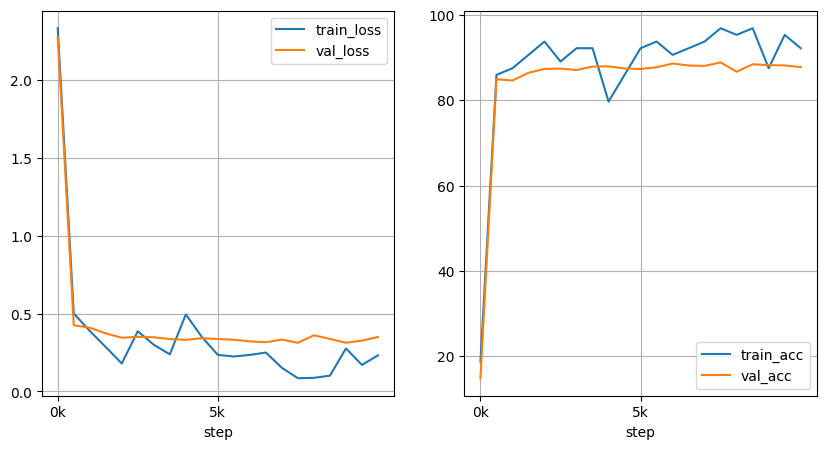

In [24]:
plot_learning_curves(history, sample_step=500)  #横坐标是 steps

In [25]:
# 在测试集上评估模型
test_accuracy = evaluate_model(model, test_loader, device, loss_fn)
test_accuracy


(87.32, 0.3576104792535305)